# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?' 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        time_marker = city_weather["dt"]
        time_obj = time.gmtime(time_marker)
        city_date = time.strftime("%m/%d/%Y", time_obj)

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | st. john's
Processing Record 7 of Set 1 | ta`u
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | camayenne
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | tralee
Processing Record 21 of Set 1 | diego de almagro
Processing Record 22 of Set 1 | utrik
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,14.44,56,0,3.67,RU,07/07/2024
1,waitangi,-43.9535,-176.5597,7.12,83,50,2.24,NZ,07/07/2024
2,uturoa,-16.7333,-151.4333,25.91,80,5,7.33,PF,07/07/2024
3,port-aux-francais,-49.3500,70.2167,2.10,83,100,12.03,TF,07/07/2024
4,pisco,-13.7000,-76.2167,20.03,73,0,3.60,PE,07/07/2024


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,14.44,56,0,3.67,RU,07/07/2024
1,waitangi,-43.9535,-176.5597,7.12,83,50,2.24,NZ,07/07/2024
2,uturoa,-16.7333,-151.4333,25.91,80,5,7.33,PF,07/07/2024
3,port-aux-francais,-49.3500,70.2167,2.10,83,100,12.03,TF,07/07/2024
4,pisco,-13.7000,-76.2167,20.03,73,0,3.60,PE,07/07/2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

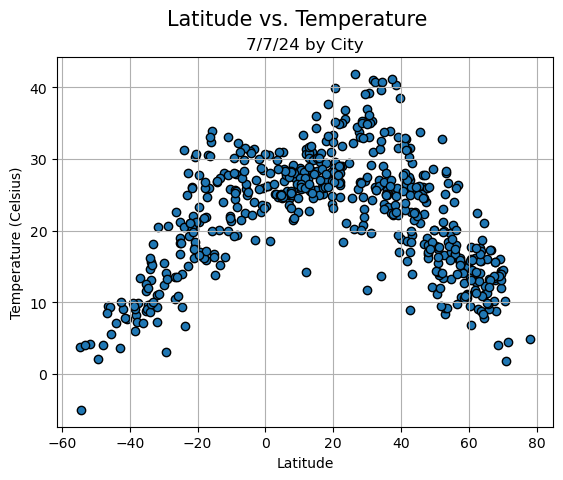

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
title_string = '7/7/24 by City'
subtitle_string ='Latitude vs. Temperature'
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.title(title_string, fontsize=12)
plt.suptitle(subtitle_string, fontsize=15)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Observations:** The relationship between latitude and temperature appears to be non-linear, with temperatures peaking at mid-latitudes (around 20 to 30 degrees) and decreasing as you move towards higher or lower latitudes. Temperatures are higher near the equator at lower latitudes and tend to decrease as latitude increases towards the north and south poles. Additionally, there is a wide spread of temperatures at lower latitudes, indicating significant variation in temperature in these regions.

#### Latitude Vs. Humidity

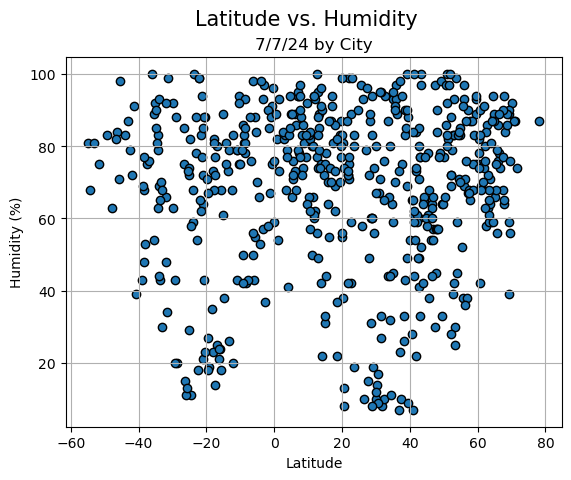

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
title_string = '7/7/24 by City'
subtitle_string ='Latitude vs. Humidity'
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(title_string, fontsize=12)
plt.suptitle(subtitle_string, fontsize=15)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

**Observations:** The plot does not show a clear linear or straightforward relationship between latitude and humidity, as humidity values range widely (0% to 100%) across all latitudes. While there are fewer data points at lower humidity levels (0% to 40%), these points appear across different latitudes, indicating that low humidity conditions are less common but can occur at any latitude. This suggests that humidity is not strongly dependent on latitude; unlike temperature, which shows a clear pattern with latitude, humidity appears to be influenced by other factors such as proximity to water bodies, local weather patterns, or altitude.

#### Latitude Vs. Cloudiness

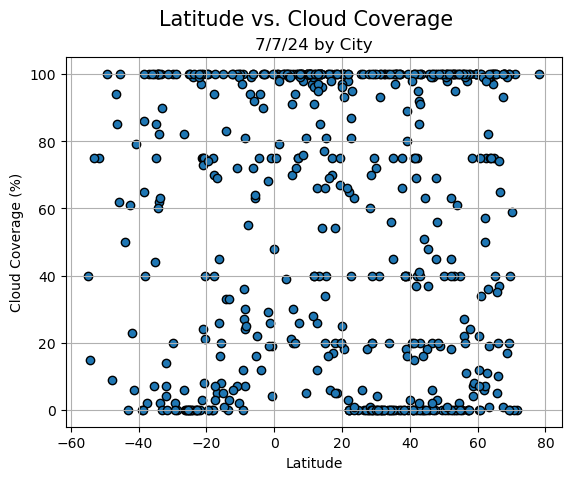

In [91]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
title_string = '7/7/24 by City'
subtitle_string ='Latitude vs. Cloud Coverage'
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage (%)')
plt.title(title_string, fontsize=12)
plt.suptitle(subtitle_string, fontsize=15)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

**Observations:** Cloud coverage appears to be clustered at two extreme values: around 0% and 100%. The scatter plot of latitude versus cloud coverage shows that cloud coverage is predominantly observed at extreme values (0% and 100%) across all latitudes. There is no clear correlation between latitude and cloud coverage, indicating that cloud coverage is influenced by factors other than latitude alone. This analysis suggests that cloud coverage may be more dependent on local weather conditions and climatic patterns rather than geographical latitude.

#### Latitude vs. Wind Speed Plot

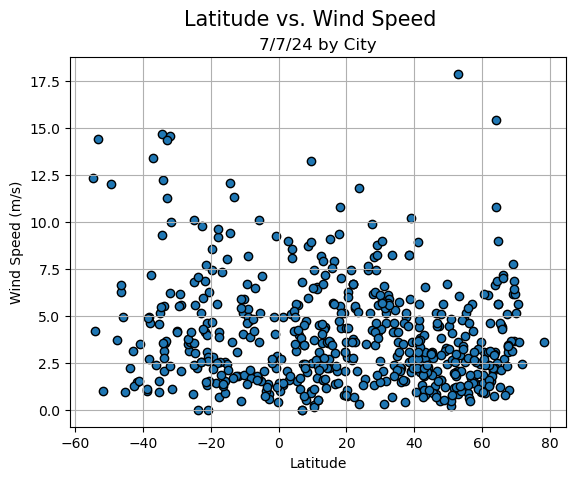

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
title_string = '7/7/24 by City'
subtitle_string ='Latitude vs. Wind Speed'
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(title_string, fontsize=12)
plt.suptitle(subtitle_string, fontsize=15)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

**Observations:** The scatter plot between latitude and wind speed shows that wind speeds are relatively consistent across various latitudes, with no strong correlation between the two variables. Wind speeds mostly fall between 0 and 10 m/s, with a few outliers reaching higher speeds. This suggests that factors other than latitude, such as local geography or climatic conditions, may play a more significant role in determining wind speed.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, text_position):

    # Create regression for hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line
    regression_values = x_values * slope + intercept

    # Plot the data points and the regression line
    plt.scatter(x_values, y_values, marker='o', edgecolor='black')
    plt.plot(x_values, regression_values, "r", label='Regression Line')

    # Create the line equation
    line_equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add annotation for the equation of the line
    plt.annotate(line_equation, text_position, fontsize=12, color="red")   

In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemishpere_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,14.44,56,0,3.67,RU,07/07/2024
5,st. john's,47.5649,-52.7093,19.04,97,100,0.45,CA,07/07/2024
10,camayenne,9.5350,-13.6878,27.05,83,100,1.03,GN,07/07/2024
11,albany,42.6001,-73.9662,31.49,60,85,2.66,US,07/07/2024
12,tiksi,71.6872,128.8694,4.53,74,0,2.43,RU,07/07/2024


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,7.12,83,50,2.24,NZ,07/07/2024
2,uturoa,-16.7333,-151.4333,25.91,80,5,7.33,PF,07/07/2024
3,port-aux-francais,-49.3500,70.2167,2.10,83,100,12.03,TF,07/07/2024
4,pisco,-13.7000,-76.2167,20.03,73,0,3.60,PE,07/07/2024
6,ta`u,-14.2336,-169.5144,26.82,81,33,9.42,AS,07/07/2024


###  Temperature vs. Latitude Linear Regression Plot

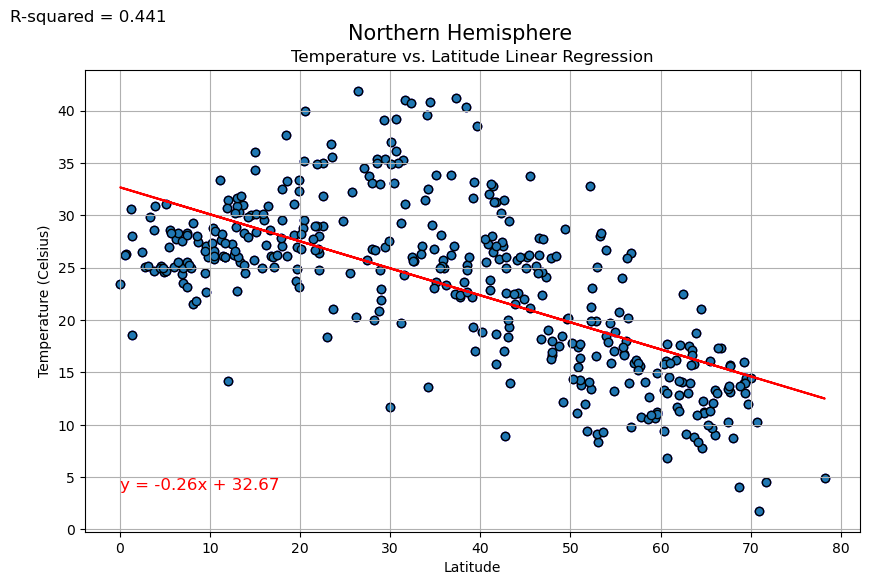

In [117]:
# Linear regression on Northern Hemisphere
x_values = northern_hemishpere_df["Lat"]
y_values = northern_hemishpere_df["Max Temp"]
title_string = 'Temperature vs. Latitude Linear Regression' 
subtitle_string = 'Northern Hemisphere'

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute regression line values
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.title(title_string, fontsize=12, loc='center')
plt.figtext(0.5, 0.93, subtitle_string, fontsize=15, ha='center')
plt.grid(True)

# Display R-squared value
r_squared_text = f'R-squared = {r_value**2:.3f}'
plt.suptitle(r_squared_text, fontsize=12, x=0.05, y=0.98, ha='left')

# Plot graph
linear_regression(x_values, y_values, text_position=(x_values.min(), y_values.min() + 2))

# Show the plot
plt.show()

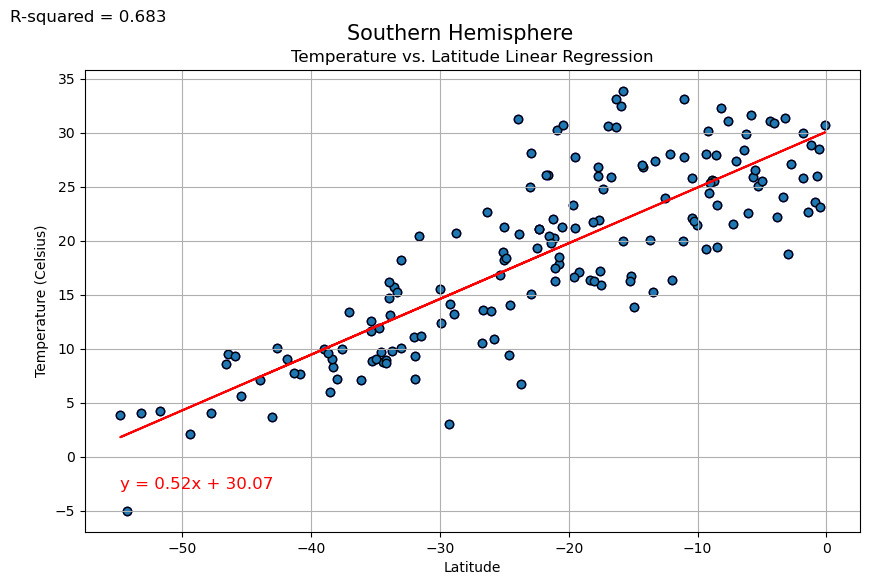

In [116]:
# Linear regression on Southern Hemispheree
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
title_string = 'Temperature vs. Latitude Linear Regression' 
subtitle_string = 'Southern Hemisphere'

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute regression line values
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.title(title_string, fontsize=12, loc='center')
plt.figtext(0.5, 0.93, subtitle_string, fontsize=15, ha='center')
plt.grid(True)

# Display R-squared value
r_squared_text = f'R-squared = {r_value**2:.3f}'
plt.suptitle(r_squared_text, fontsize=12, x=0.05, y=0.98, ha='left')

# Plot graph
linear_regression(x_values, y_values, text_position=(x_values.min(), y_values.min() + 2))


# Show the plot
plt.show()

**Discussion about the linear relationship:** The linear regression plots for the Northern and Southern Hemispheres illustrate distinct relationships between latitude and temperature. In the Northern Hemisphere we see that the scatter plot and regression line shows a negative linear relationship between latitude and temperature while the Southern Hemisphere shows a positive linear relationship. The slope for the Northern Hemisphere indicates that for every degree increase in latitude, the temperature decreases by 0.26 celsius and for the Southern Hemisphere for every degree increase in latitude moving southward the temperature increases by 0.52 celsius.The steeper slope in the Southern Hemisphere indicates a more pronounced change in temperature with latitude compared to the Northern Hemisphere.The linear regression analyses of temperature versus latitude for both hemispheres reveal opposite trends, the Northern Hemisphere shows a more gradual decrease in temperature with increasing latitude, whereas the Southern Hemisphere shows a more rapid increase

### Humidity vs. Latitude Linear Regression Plot

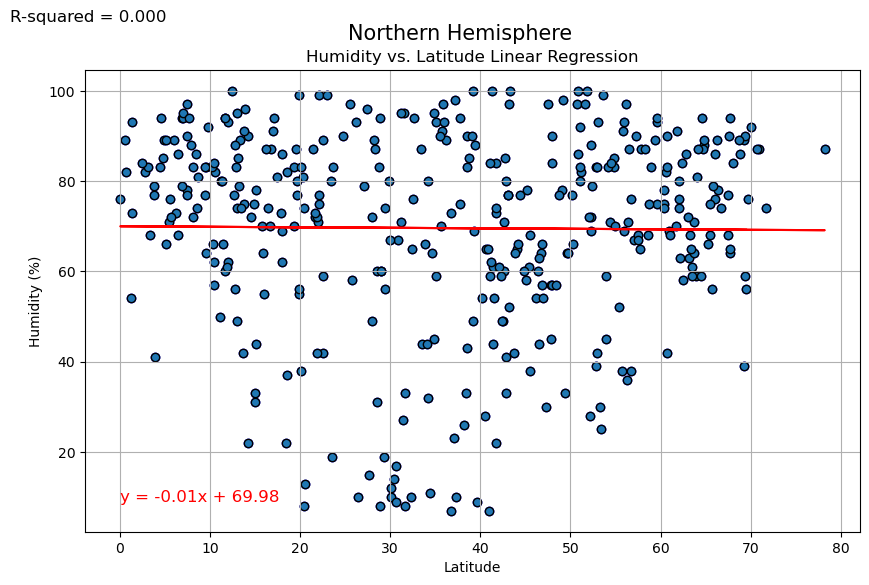

In [115]:
# Northern Hemisphere
x_values = northern_hemishpere_df["Lat"]
y_values = northern_hemishpere_df["Humidity"]
title_string = 'Humidity vs. Latitude Linear Regression' 
subtitle_string = 'Northern Hemisphere'

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute regression line values
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(title_string, fontsize=12, loc='center')
plt.figtext(0.5, 0.93, subtitle_string, fontsize=15, ha='center')
plt.grid(True)

# Plot graph
linear_regression(x_values, y_values, text_position=(x_values.min(), y_values.min() + 2))

# Display R-squared value
r_squared_text = f'R-squared = {r_value**2:.3f}'
plt.suptitle(r_squared_text, fontsize=12, x=0.05, y=0.98, ha='left')

# Show the plot
plt.show()

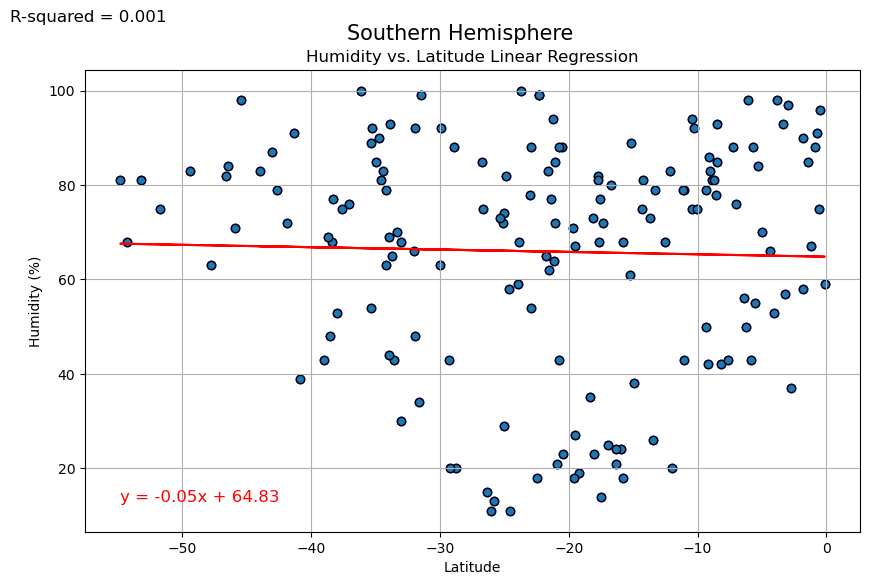

In [118]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
title_string = 'Humidity vs. Latitude Linear Regression' 
subtitle_string = 'Southern Hemisphere'

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute regression line values
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(title_string, fontsize=12, loc='center')
plt.figtext(0.5, 0.93, subtitle_string, fontsize=15, ha='center')
plt.grid(True)

# Display R-squared value
r_squared_text = f'R-squared = {r_value**2:.3f}'
plt.suptitle(r_squared_text, fontsize=12, x=0.05, y=0.98, ha='left')

# Plot graph
linear_regression(x_values, y_values, text_position=(x_values.min(), y_values.min() + 2))


# Show the plot
plt.show()

**Discussion about the linear relationship:** The linear relationship for both hemispheres exhibit a negative slope, indicating a minor decrease in humidity with increasing latitude. The Southern Hemisphere’s slope is lsightly steeper than that of the Northern Hemisphere, but both slopes are relatively close to zero, indicating weak correlations. Both graphs show that humidity values are highly variable across different latitudes, ranging from very low to very high humidity levels. The slightly steeper slope in the Southern Hemisphere indicates a marginally stronger relationship compared to the Northern Hemisphere. However, in both cases, the impact of latitude on humidity is minimal, emphasizing the influence of other factors in shaping humidity patterns across different regions.

### Cloudiness vs. Latitude Linear Regression Plot

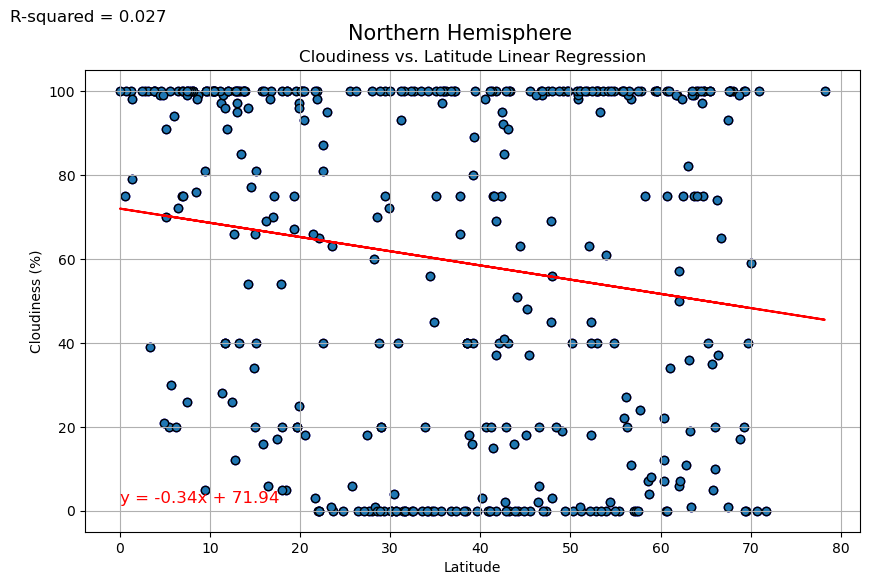

In [119]:
# Northern Hemisphere
x_values = northern_hemishpere_df['Lat']
y_values = northern_hemishpere_df['Cloudiness']
title_string = 'Cloudiness vs. Latitude Linear Regression' 
subtitle_string = 'Northern Hemisphere'

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute regression line values
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(title_string, fontsize=12, loc='center')
plt.figtext(0.5, 0.93, subtitle_string, fontsize=15, ha='center')
plt.grid(True)

# Display R-squared value
r_squared_text = f'R-squared = {r_value**2:.3f}'
plt.suptitle(r_squared_text, fontsize=12, x=0.05, y=0.98, ha='left')

# Plot graph
linear_regression(x_values, y_values, text_position=(x_values.min(), y_values.min() + 2))


# Show the plot
plt.show()

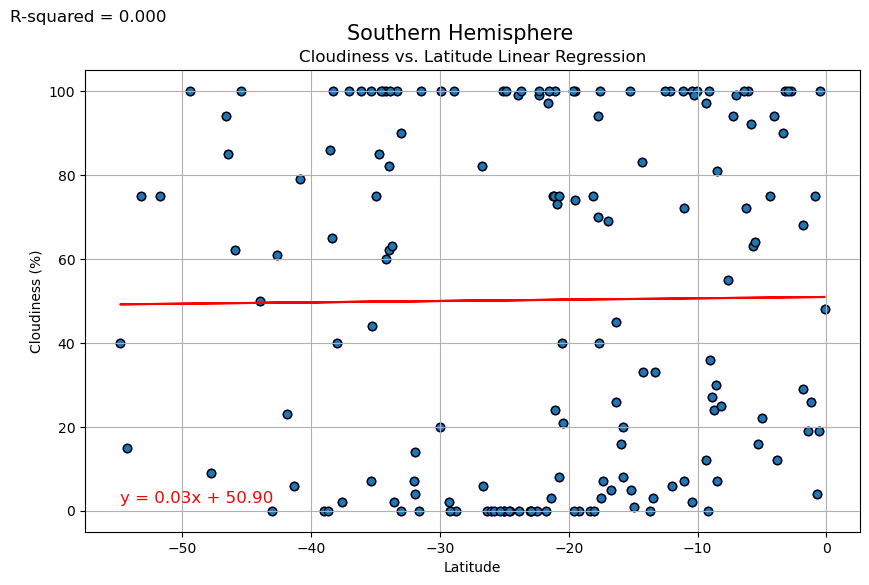

In [120]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
title_string = 'Cloudiness vs. Latitude Linear Regression' 
subtitle_string = 'Southern Hemisphere'

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute regression line values
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(title_string, fontsize=12, loc='center')
plt.figtext(0.5, 0.93, subtitle_string, fontsize=15, ha='center')
plt.grid(True)

# Display R-squared value
r_squared_text = f'R-squared = {r_value**2:.3f}'
plt.suptitle(r_squared_text, fontsize=12, x=0.05, y=0.98, ha='left')

# Plot graph
linear_regression(x_values, y_values, text_position=(x_values.min(), y_values.min() + 2))

# Show the plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere graph we see a slight negative linear relationship between latitude and the percentage of cloud coverage. The values for the percent of cloud coverage is widely scattered with significant values clustering around 0% and 100%. The wide spread of data points suggests that latitude has a weak influence on cloudiness in the Northern Hemisphere. In the Southern Hemisphere the scatter plot and regression line exhibit a very slight positive linear relationship.Similar to the Northern Hemisphere, cloudiness values are broadly distributed, with clusters at both 0% and 100%. The nearly flat regression line suggests that latitude has a minimal impact on cloudiness in the Southern Hemisphere. In both hemispheres, cloudiness values exhibit high variability across different latitudes, ranging from very low to very high levels and both slopes are close to zero, indicating weak correlations between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

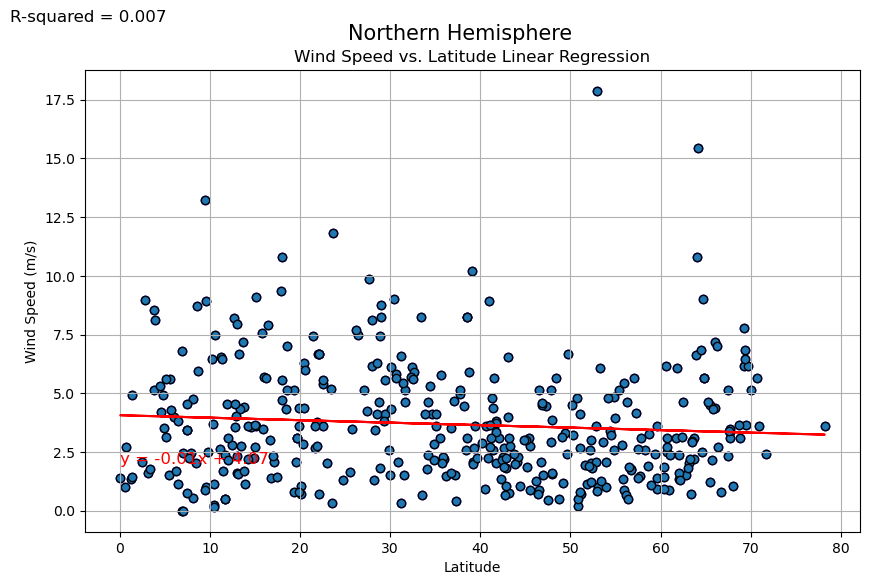

In [121]:
# Northern Hemisphere
x_values = northern_hemishpere_df['Lat']
y_values = northern_hemishpere_df['Wind Speed']
title_string = 'Wind Speed vs. Latitude Linear Regression' 
subtitle_string = 'Northern Hemisphere'

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute regression line values
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(title_string, fontsize=12, loc='center')
plt.figtext(0.5, 0.93, subtitle_string, fontsize=15, ha='center')
plt.grid(True)

# Display R-squared value
r_squared_text = f'R-squared = {r_value**2:.3f}'
plt.suptitle(r_squared_text, fontsize=12, x=0.05, y=0.98, ha='left')

# Plot graph
linear_regression(x_values, y_values, text_position=(x_values.min(), y_values.min() + 2))

# Show the plot
plt.show()

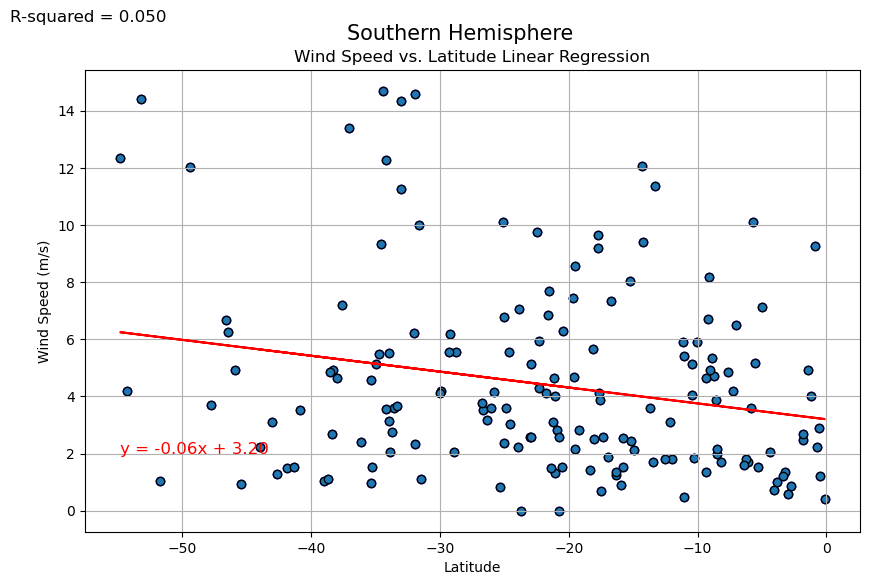

In [122]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
title_string = 'Wind Speed vs. Latitude Linear Regression' 
subtitle_string = 'Southern Hemisphere'

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Compute regression line values
regress_values = x_values * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(title_string, fontsize=12, loc='center')
plt.figtext(0.5, 0.93, subtitle_string, fontsize=15, ha='center')
plt.grid(True)

# Display R-squared value
r_squared_text = f'R-squared = {r_value**2:.3f}'
plt.suptitle(r_squared_text, fontsize=12, x=0.05, y=0.98, ha='left')

# Plot graph
linear_regression(x_values, y_values, text_position=(x_values.min(), y_values.min() + 2))

# Show the plot
plt.show()

**Discussion about the linear relationship:** In both hemispheres, wind speeds show high variability across different latitudes, with values broadly distributed from low to high speeds.The Northern Hemisphere shows a few higher outliers in wind speed, while the Southern Hemisphere demonstrates a more even distribution without extreme outliers. We see that both Hemispheres show a negative linear relationship between latitude and wind speed. In the Northern Hemisphere wind speeds are broadly scattered, with most values between 0 and 10 m/s, and a few outliers reaching up to approximately 17.5 m/s. While the Southern Hemisphere shows a similar spread, with values ranging from 0 to over 12 m/s, though there are fewer extreme outliers compared to the Northern Hemisphere. Both hemispheres reveal weak negative relationships, with wind speeds decreasing slightly as latitude increases. 